<a href="https://colab.research.google.com/github/dayaiit/Deep-Learning/blob/main/Lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
🧠 Deep Learning Lecture 1: Neural Networks Foundation
=====================================================

Learning Objectives:
1. Understand what neural networks are using practical examples
2. Compare traditional programming vs deep learning approaches
3. Build and visualize a simple neural network
4. Recognize the power of layered learning

Author: Dean, School of Sciences
Course: Deep Learning (Semester 5)
"""

# ============================================================================
# 📦 SETUP AND IMPORTS
# ============================================================================

# Install required packages (run this in Colab)
# !pip install -q matplotlib seaborn numpy pandas scikit-learn

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

print("🚀 All libraries imported successfully!")
print("📚 Ready for Deep Learning Lecture 1!")



🚀 All libraries imported successfully!
📚 Ready for Deep Learning Lecture 1!



🧩 SECTION 1: THE BRAIN CONNECTION
🧠 Human Decision Making Simulation

📍 Scenario: Job Interview
   Inputs: Weather=4, Occasion=5, Comfort=3, Clean=5
   Decision Score: 4.20
   Decision: 👔 Wear formal clothes

📍 Scenario: Weekend at Home
   Inputs: Weather=3, Occasion=2, Comfort=5, Clean=3
   Decision Score: 3.10
   Decision: 👕 Wear casual clothes

📍 Scenario: Date Night
   Inputs: Weather=4, Occasion=5, Comfort=4, Clean=5
   Decision Score: 4.40
   Decision: 👔 Wear formal clothes

📍 Scenario: Gym Session
   Inputs: Weather=3, Occasion=1, Comfort=5, Clean=4
   Decision Score: 2.90
   Decision: 👕 Wear casual clothes

💡 This is exactly how artificial neurons work!
   Multiple inputs × weights → sum → decision


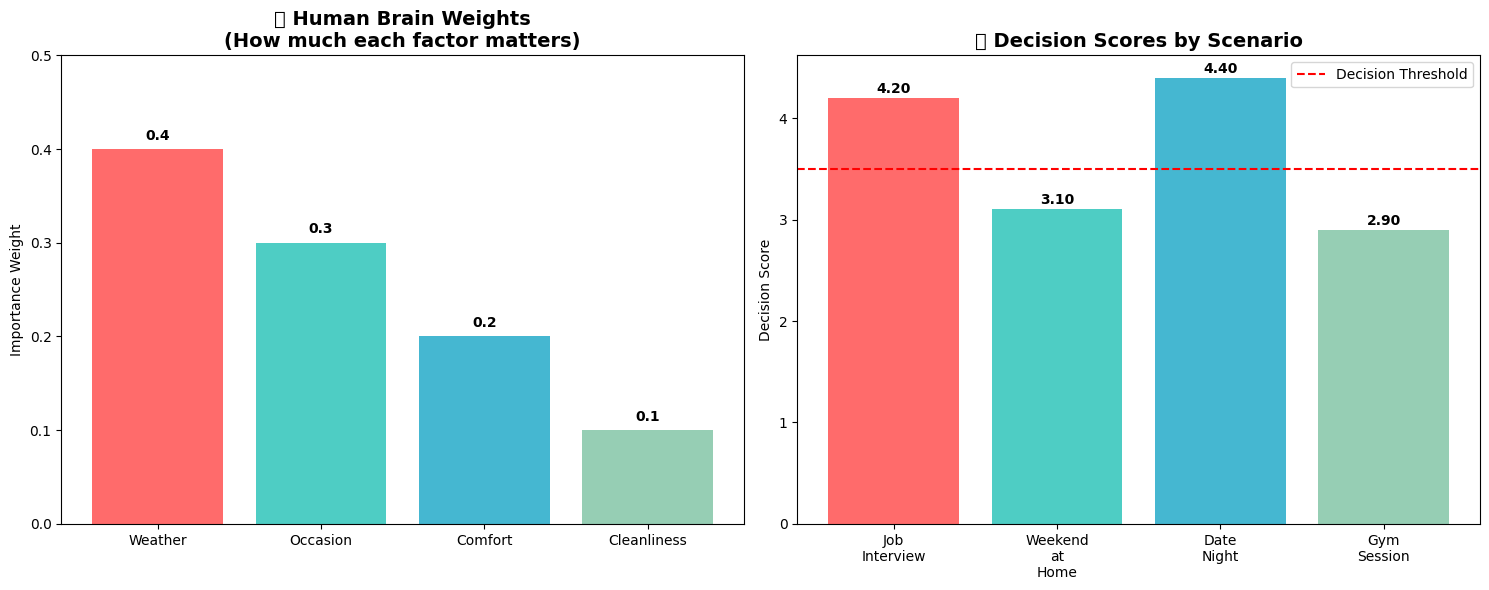


🎯 Key Insight: Your brain automatically weights different factors!
   This is the foundation of how artificial neurons work.


In [2]:
# ============================================================================
# 🧩 SECTION 1: THE BRAIN CONNECTION
# ============================================================================

print("\n" + "="*60)
print("🧩 SECTION 1: THE BRAIN CONNECTION")
print("="*60)

# Simulate human decision making: "What to wear today?"

class HumanDecisionMaker:
    def __init__(self):
        # These are like weights in our brain
        self.weather_importance = 0.4      # High importance
        self.occasion_importance = 0.3     # Medium importance
        self.comfort_importance = 0.2      # Medium importance
        self.cleanliness_importance = 0.1  # Lower importance

    def make_decision(self, weather_score, occasion_score, comfort_score, cleanliness_score):
        # This is like a neuron calculating weighted sum
        decision_score = (weather_score * self.weather_importance +
                         occasion_score * self.occasion_importance +
                         comfort_score * self.comfort_importance +
                         cleanliness_score * self.cleanliness_importance)

        # Decision threshold (like activation function)
        if decision_score >= 3.5:
            return "👔 Wear formal clothes", decision_score
        else:
            return "👕 Wear casual clothes", decision_score

# Create decision maker
brain = HumanDecisionMaker()

# Test different scenarios
scenarios = [
    {"name": "Job Interview", "weather": 4, "occasion": 5, "comfort": 3, "cleanliness": 5},
    {"name": "Weekend at Home", "weather": 3, "occasion": 2, "comfort": 5, "cleanliness": 3},
    {"name": "Date Night", "weather": 4, "occasion": 5, "comfort": 4, "cleanliness": 5},
    {"name": "Gym Session", "weather": 3, "occasion": 1, "comfort": 5, "cleanliness": 4}
]

print("🧠 Human Decision Making Simulation")
print("=" * 50)

for scenario in scenarios:
    decision, score = brain.make_decision(
        scenario["weather"], scenario["occasion"],
        scenario["comfort"], scenario["cleanliness"]
    )
    print(f"\n📍 Scenario: {scenario['name']}")
    print(f"   Inputs: Weather={scenario['weather']}, Occasion={scenario['occasion']}, "
          f"Comfort={scenario['comfort']}, Clean={scenario['cleanliness']}")
    print(f"   Decision Score: {score:.2f}")
    print(f"   Decision: {decision}")

print("\n💡 This is exactly how artificial neurons work!")
print("   Multiple inputs × weights → sum → decision")

# VISUALIZATION 1: Human Decision Process
def visualize_human_decision():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot 1: Input importance (weights)
    factors = ['Weather', 'Occasion', 'Comfort', 'Cleanliness']
    weights = [0.4, 0.3, 0.2, 0.1]
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

    bars1 = ax1.bar(factors, weights, color=colors)
    ax1.set_title('🧠 Human Brain Weights\n(How much each factor matters)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Importance Weight')
    ax1.set_ylim(0, 0.5)

    # Add value labels on bars
    for i, v in enumerate(weights):
        ax1.text(i, v + 0.01, f'{v}', ha='center', fontweight='bold')

    # Plot 2: Decision scores for scenarios
    scenario_names = [s['name'] for s in scenarios]
    scores = []
    for scenario in scenarios:
        _, score = brain.make_decision(
            scenario["weather"], scenario["occasion"],
            scenario["comfort"], scenario["cleanliness"]
        )
        scores.append(score)

    bars2 = ax2.bar(range(len(scenario_names)), scores, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
    ax2.axhline(y=3.5, color='red', linestyle='--', label='Decision Threshold')
    ax2.set_title('📊 Decision Scores by Scenario', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Decision Score')
    ax2.set_xticks(range(len(scenario_names)))
    ax2.set_xticklabels([name.replace(' ', '\n') for name in scenario_names])
    ax2.legend()

    # Add score labels
    for i, v in enumerate(scores):
        ax2.text(i, v + 0.05, f'{v:.2f}', ha='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

    print("\n🎯 Key Insight: Your brain automatically weights different factors!")
    print("   This is the foundation of how artificial neurons work.")

# Run visualization
visualize_human_decision()



In [3]:
# ============================================================================
# 🔄 SECTION 2: TRADITIONAL VS DEEP LEARNING
# ============================================================================

print("\n" + "="*60)
print("🔄 SECTION 2: TRADITIONAL VS DEEP LEARNING")
print("="*60)

# Traditional Rule-Based Spam Detection

class TraditionalSpamDetector:
    def __init__(self):
        self.spam_keywords = ['FREE', 'WIN', 'LOTTERY', 'URGENT', 'MONEY', 'CLICK NOW']
        self.suspicious_patterns = ['ALL CAPS', 'MULTIPLE !!!', 'Unknown sender']

    def detect_spam(self, email_subject, email_body, sender_known=True):
        spam_score = 0
        reasons = []

        # Rule 1: Check for spam keywords
        email_text = (email_subject + " " + email_body).upper()
        for keyword in self.spam_keywords:
            if keyword in email_text:
                spam_score += 2
                reasons.append(f"Contains keyword: {keyword}")

        # Rule 2: Check for ALL CAPS
        if email_subject.isupper() and len(email_subject) > 10:
            spam_score += 1
            reasons.append("Subject in ALL CAPS")

        # Rule 3: Check for excessive exclamation marks
        if email_text.count('!') > 3:
            spam_score += 1
            reasons.append("Too many exclamation marks")

        # Rule 4: Unknown sender
        if not sender_known:
            spam_score += 1
            reasons.append("Unknown sender")

        is_spam = spam_score >= 3
        return is_spam, spam_score, reasons

# Simulated Deep Learning Approach (Conceptual)

class SimpleDeepLearningSpamDetector:
    def __init__(self):
        # This simulates a trained neural network
        # In reality, these patterns would be learned automatically
        self.learned_patterns = {
            'urgent_money_combo': 0.8,    # High spam probability
            'caps_with_exclamation': 0.7,
            'unknown_sender_urgency': 0.6,
            'office_communication': -0.8,  # Negative means "not spam"
            'meeting_related': -0.6,
            'known_sender_casual': -0.4
        }

    def extract_features(self, subject, body, sender_known):
        """Extract learned features (this would be automatic in real DL)"""
        features = {}
        text = (subject + " " + body).lower()

        # Feature 1: Urgent money combination
        urgent_words = ['urgent', 'now', 'immediately', 'limited']
        money_words = ['money', 'free', 'win', 'lottery', 'cash']
        features['urgent_money_combo'] = (
            any(word in text for word in urgent_words) and
            any(word in text for word in money_words)
        )

        # Feature 2: Caps with exclamation
        features['caps_with_exclamation'] = (
            subject.isupper() and '!' in (subject + body)
        )

        # Feature 3: Unknown sender with urgency
        features['unknown_sender_urgency'] = (
            not sender_known and any(word in text for word in urgent_words)
        )

        # Feature 4: Office communication
        office_words = ['meeting', 'office', 'cafeteria', 'colleague']
        features['office_communication'] = any(word in text for word in office_words)

        # Feature 5: Meeting related
        meeting_words = ['meeting', 'appointment', 'schedule', 'reminder']
        features['meeting_related'] = any(word in text for word in meeting_words)

        # Feature 6: Known sender casual
        features['known_sender_casual'] = (
            sender_known and not any(word in text for word in urgent_words + money_words)
        )

        return features

    def predict(self, subject, body, sender_known):
        features = self.extract_features(subject, body, sender_known)

        # Calculate spam probability (simplified neural network output)
        spam_score = 0
        active_features = []

        for feature_name, is_present in features.items():
            if is_present:
                spam_score += self.learned_patterns[feature_name]
                active_features.append(feature_name)

        # Convert to probability (sigmoid-like function)
        spam_probability = 1 / (1 + np.exp(-spam_score))
        is_spam = spam_probability > 0.5

        return is_spam, spam_probability, active_features

# Test both approaches
def test_spam_detection():
    # Test traditional approach
    traditional_detector = TraditionalSpamDetector()

    test_emails = [
        {
            "subject": "YOU WON THE LOTTERY!!!",
            "body": "CLICK NOW to claim your FREE MONEY! This is URGENT!",
            "sender_known": False,
            "actual_spam": True
        },
        {
            "subject": "Meeting Tomorrow",
            "body": "Hi, just reminding about our meeting tomorrow at 2 PM.",
            "sender_known": True,
            "actual_spam": False
        },
        {
            "subject": "Free Pizza Friday!",
            "body": "Come join us for free pizza in the office cafeteria!",
            "sender_known": True,
            "actual_spam": False
        },
        {
            "subject": "Investment opportunity",
            "body": "Double your savings with this amazing opportunity. Limited time offer.",
            "sender_known": False,
            "actual_spam": True
        }
    ]

    print("📧 Traditional Rule-Based Spam Detection")
    print("=" * 60)

    correct_predictions = 0
    for i, email in enumerate(test_emails, 1):
        is_spam, score, reasons = traditional_detector.detect_spam(
            email["subject"], email["body"], email["sender_known"]
        )

        correct = is_spam == email["actual_spam"]
        if correct:
            correct_predictions += 1

        print(f"\n📨 Email {i}: {email['subject'][:30]}...")
        print(f"   Predicted: {'SPAM' if is_spam else 'NOT SPAM'} (Score: {score})")
        print(f"   Actual: {'SPAM' if email['actual_spam'] else 'NOT SPAM'}")
        print(f"   Correct: {'✅' if correct else '❌'}")
        if reasons:
            print(f"   Reasons: {', '.join(reasons)}")

    accuracy = (correct_predictions / len(test_emails)) * 100
    print(f"\n📊 Traditional Approach Accuracy: {accuracy:.1f}%")

    print("\n⚠️ Problems with Traditional Approach:")
    print("   1. Endless rules needed as spammers adapt")
    print("   2. False positives (good emails marked as spam)")
    print("   3. Can't detect new spam patterns automatically")
    print("   4. Requires manual updates for every new trick")

    # Test deep learning approach
    dl_detector = SimpleDeepLearningSpamDetector()

    print("\n🤖 Deep Learning Spam Detection (Simulated)")
    print("=" * 60)

    correct_predictions_dl = 0
    for i, email in enumerate(test_emails, 1):
        is_spam, probability, features = dl_detector.predict(
            email["subject"], email["body"], email["sender_known"]
        )

        correct = is_spam == email["actual_spam"]
        if correct:
            correct_predictions_dl += 1

        print(f"\n📨 Email {i}: {email['subject'][:30]}...")
        print(f"   Predicted: {'SPAM' if is_spam else 'NOT SPAM'} (Probability: {probability:.2f})")
        print(f"   Actual: {'SPAM' if email['actual_spam'] else 'NOT SPAM'}")
        print(f"   Correct: {'✅' if correct else '❌'}")
        if features:
            print(f"   Detected patterns: {', '.join(features)}")

    accuracy_dl = (correct_predictions_dl / len(test_emails)) * 100
    print(f"\n📊 Deep Learning Approach Accuracy: {accuracy_dl:.1f}%")

    print("\n🌟 Advantages of Deep Learning Approach:")
    print("   1. Automatically discovers hidden patterns")
    print("   2. Adapts to new spam tactics without manual rules")
    print("   3. Learns from examples, not explicit programming")
    print("   4. Can handle complex pattern combinations")

# Run spam detection test
test_spam_detection()




🔄 SECTION 2: TRADITIONAL VS DEEP LEARNING
📧 Traditional Rule-Based Spam Detection

📨 Email 1: YOU WON THE LOTTERY!!!...
   Predicted: SPAM (Score: 13)
   Actual: SPAM
   Correct: ✅
   Reasons: Contains keyword: FREE, Contains keyword: LOTTERY, Contains keyword: URGENT, Contains keyword: MONEY, Contains keyword: CLICK NOW, Subject in ALL CAPS, Too many exclamation marks, Unknown sender

📨 Email 2: Meeting Tomorrow...
   Predicted: NOT SPAM (Score: 0)
   Actual: NOT SPAM
   Correct: ✅

📨 Email 3: Free Pizza Friday!...
   Predicted: NOT SPAM (Score: 2)
   Actual: NOT SPAM
   Correct: ✅
   Reasons: Contains keyword: FREE

📨 Email 4: Investment opportunity...
   Predicted: NOT SPAM (Score: 1)
   Actual: SPAM
   Correct: ❌
   Reasons: Unknown sender

📊 Traditional Approach Accuracy: 75.0%

⚠️ Problems with Traditional Approach:
   1. Endless rules needed as spammers adapt
   2. False positives (good emails marked as spam)
   3. Can't detect new spam patterns automatically
   4. Requires man


🧱 SECTION 3: BUILDING BLOCKS OF NEURAL NETWORKS
🍽️ Restaurant Recommendation Neuron in Action
Neuron weights: [0.4, 0.3, 0.2, 0.1]
Bias: 0.5

How it works:
1. Weighted Sum = (inputs × weights)
2. Add Bias = weighted_sum + bias
3. Activation = max(0, total) [ReLU function]
4. Decision = recommend if activation >= 3.5

🏪 Mario's Pizza
   Inputs: Friend=4.0, You=3.0, Online=4.5, Price=2.0
   Weighted Sum: 3.60
   With Bias: 4.10
   After ReLU: 4.10
   Decision: 🍽️ RECOMMEND!

🏪 Fancy French Place
   Inputs: Friend=5.0, You=2.0, Online=4.8, Price=5.0
   Weighted Sum: 4.06
   With Bias: 4.56
   After ReLU: 4.56
   Decision: 🍽️ RECOMMEND!

🏪 Quick Burger Joint
   Inputs: Friend=2.0, You=3.0, Online=3.2, Price=1.0
   Weighted Sum: 2.44
   With Bias: 2.94
   After ReLU: 2.94
   Decision: ❌ Skip this one

🏪 Amazing Sushi Bar
   Inputs: Friend=4.5, You=4.0, Online=4.7, Price=3.5
   Weighted Sum: 4.29
   With Bias: 4.79
   After ReLU: 4.79
   Decision: 🍽️ RECOMMEND!

💡 This is exactly what an ar

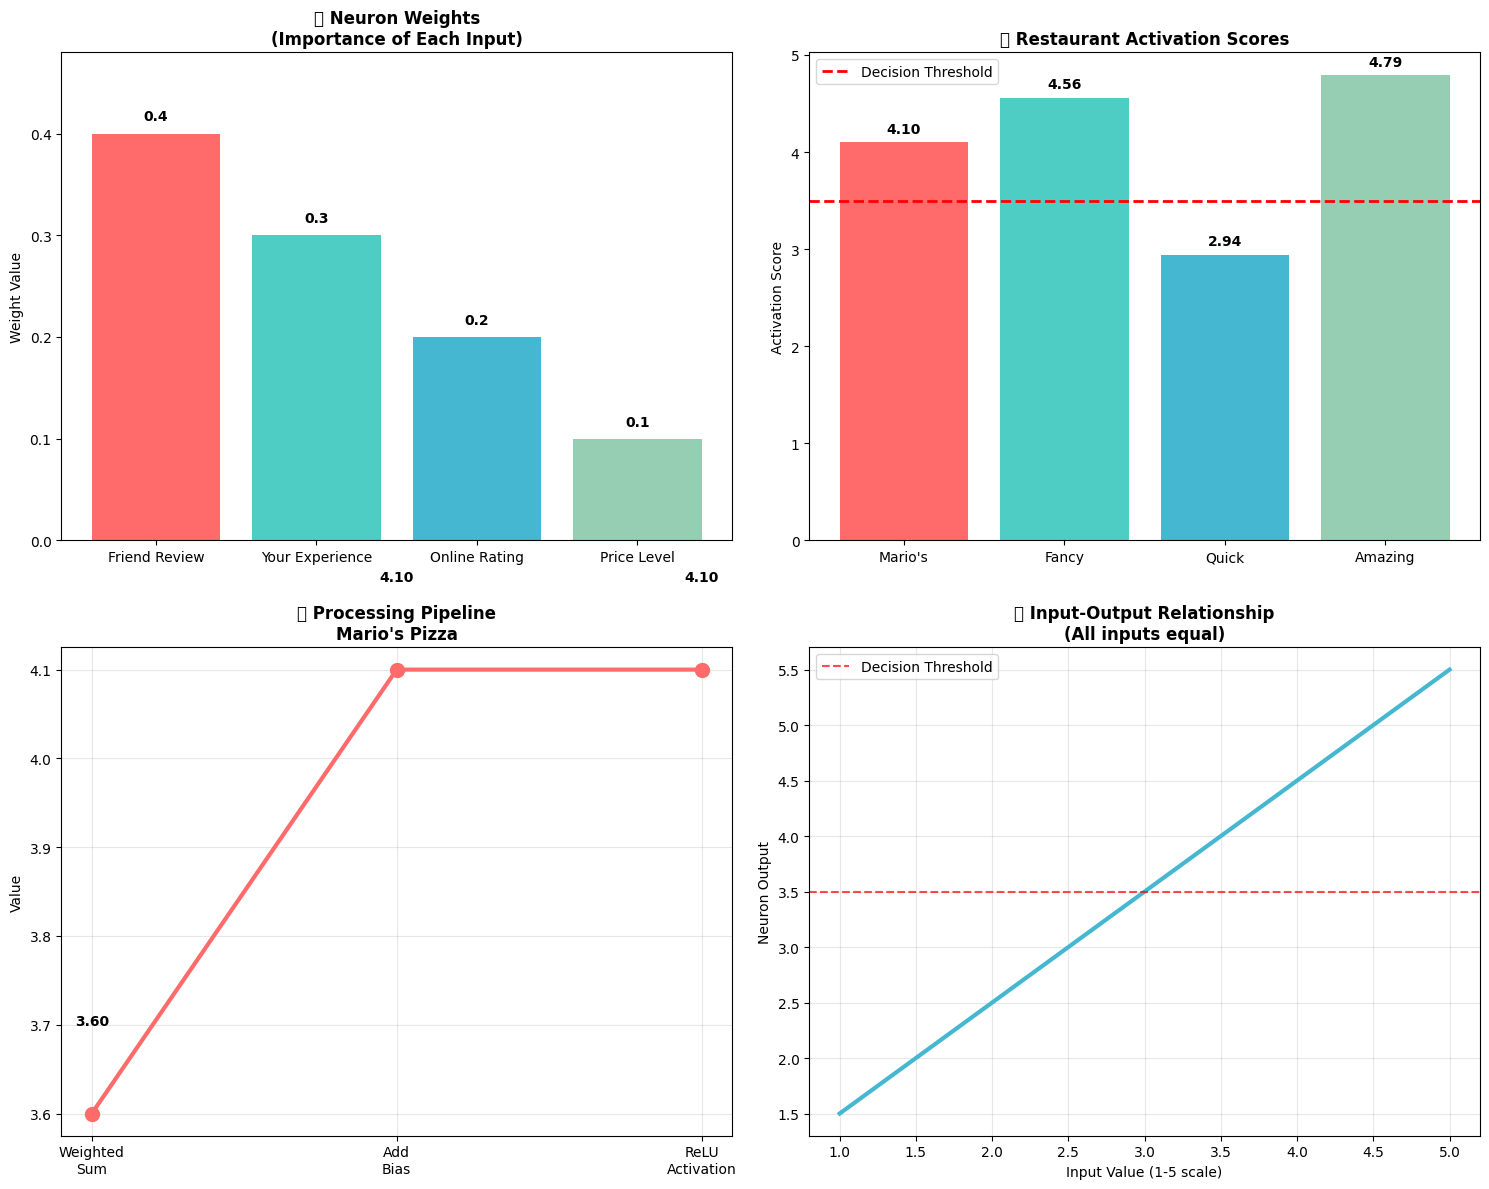


🎯 Key Insights from Visualization:
1. Weights determine how much each input matters
2. Bias shifts the decision threshold
3. Activation function (ReLU) ensures non-negative output
4. Decision threshold creates binary classification


In [4]:
# ============================================================================
# 🧱 SECTION 3: BUILDING BLOCKS OF NEURAL NETWORKS
# ============================================================================

print("\n" + "="*60)
print("🧱 SECTION 3: BUILDING BLOCKS OF NEURAL NETWORKS")
print("="*60)

# Restaurant Recommendation Neuron

class RestaurantNeuron:
    def __init__(self, weights, bias, name="Restaurant Recommender"):
        self.weights = weights  # How much each factor matters
        self.bias = bias       # Personal preference/threshold
        self.name = name

    def activate(self, inputs):
        """Process inputs and make decision"""
        # Step 1: Calculate weighted sum
        weighted_sum = sum(input_val * weight for input_val, weight in zip(inputs, self.weights))

        # Step 2: Add bias
        total = weighted_sum + self.bias

        # Step 3: Apply activation function (threshold)
        activated = max(0, total)  # ReLU activation (only positive values)

        return activated, total, weighted_sum

    def recommend(self, friend_review, your_experience, online_rating, price_level):
        inputs = [friend_review, your_experience, online_rating, price_level]
        activated, total, weighted_sum = self.activate(inputs)

        # Decision threshold
        recommendation = "🍽️ RECOMMEND!" if activated >= 3.5 else "❌ Skip this one"

        return {
            'inputs': inputs,
            'weighted_sum': weighted_sum,
            'total_with_bias': total,
            'activated': activated,
            'recommendation': recommendation
        }

def test_restaurant_neuron():
    # Create restaurant neuron with specific preferences
    # Weights: [friend_opinion, your_experience, online_reviews, price_concern]
    restaurant_neuron = RestaurantNeuron(
        weights=[0.4, 0.3, 0.2, 0.1],  # Friend's opinion matters most
        bias=0.5  # Slightly optimistic bias
    )

    # Test different restaurants
    restaurants = [
        {
            "name": "Mario's Pizza",
            "friend_review": 4.0,
            "your_experience": 3.0,
            "online_rating": 4.5,
            "price_level": 2.0  # 1=cheap, 5=expensive
        },
        {
            "name": "Fancy French Place",
            "friend_review": 5.0,
            "your_experience": 2.0,
            "online_rating": 4.8,
            "price_level": 5.0
        },
        {
            "name": "Quick Burger Joint",
            "friend_review": 2.0,
            "your_experience": 3.0,
            "online_rating": 3.2,
            "price_level": 1.0
        },
        {
            "name": "Amazing Sushi Bar",
            "friend_review": 4.5,
            "your_experience": 4.0,
            "online_rating": 4.7,
            "price_level": 3.5
        }
    ]

    print("🍽️ Restaurant Recommendation Neuron in Action")
    print("=" * 60)
    print(f"Neuron weights: {restaurant_neuron.weights}")
    print(f"Bias: {restaurant_neuron.bias}")
    print("\nHow it works:")
    print("1. Weighted Sum = (inputs × weights)")
    print("2. Add Bias = weighted_sum + bias")
    print("3. Activation = max(0, total) [ReLU function]")
    print("4. Decision = recommend if activation >= 3.5")

    results = []
    for restaurant in restaurants:
        result = restaurant_neuron.recommend(
            restaurant["friend_review"],
            restaurant["your_experience"],
            restaurant["online_rating"],
            restaurant["price_level"]
        )

        print(f"\n🏪 {restaurant['name']}")
        print(f"   Inputs: Friend={restaurant['friend_review']}, You={restaurant['your_experience']}, "
              f"Online={restaurant['online_rating']}, Price={restaurant['price_level']}")
        print(f"   Weighted Sum: {result['weighted_sum']:.2f}")
        print(f"   With Bias: {result['total_with_bias']:.2f}")
        print(f"   After ReLU: {result['activated']:.2f}")
        print(f"   Decision: {result['recommendation']}")

        results.append({**restaurant, **result})

    print("\n💡 This is exactly what an artificial neuron does!")
    print("   Multiple inputs × weights → sum → bias → activation → decision")

    return restaurant_neuron, results

# Run restaurant neuron test
restaurant_neuron, restaurant_results = test_restaurant_neuron()

# VISUALIZATION 2: Neuron in Action
def visualize_neuron_processing():
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # Plot 1: Neuron weights
    input_types = ['Friend Review', 'Your Experience', 'Online Rating', 'Price Level']
    weights = restaurant_neuron.weights
    colors1 = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

    bars1 = ax1.bar(input_types, weights, color=colors1)
    ax1.set_title('🧠 Neuron Weights\n(Importance of Each Input)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Weight Value')
    ax1.set_ylim(0, max(weights) * 1.2)

    # Add value labels
    for bar, weight in zip(bars1, weights):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{weight}', ha='center', va='bottom', fontweight='bold')

    # Plot 2: Restaurant scores comparison
    restaurant_names = [r['name'] for r in restaurant_results]
    activated_scores = [r['activated'] for r in restaurant_results]
    colors2 = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

    bars2 = ax2.bar(range(len(restaurant_names)), activated_scores, color=colors2)
    ax2.axhline(y=3.5, color='red', linestyle='--', linewidth=2, label='Decision Threshold')
    ax2.set_title('🍽️ Restaurant Activation Scores', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Activation Score')
    ax2.set_xticks(range(len(restaurant_names)))
    ax2.set_xticklabels([name.split()[0] for name in restaurant_names])
    ax2.legend()

    # Add score labels
    for i, score in enumerate(activated_scores):
        ax2.text(i, score + 0.1, f'{score:.2f}', ha='center', fontweight='bold')

    # Plot 3: Processing pipeline for one restaurant
    mario_result = restaurant_results[0]  # Mario's Pizza
    stages = ['Weighted\nSum', 'Add\nBias', 'ReLU\nActivation']
    values = [mario_result['weighted_sum'], mario_result['total_with_bias'], mario_result['activated']]

    ax3.plot(stages, values, 'o-', linewidth=3, markersize=10, color='#FF6B6B')
    ax3.set_title(f"📊 Processing Pipeline\n{mario_result['name']}", fontsize=12, fontweight='bold')
    ax3.set_ylabel('Value')
    ax3.grid(True, alpha=0.3)

    # Add value labels
    for i, v in enumerate(values):
        ax3.text(i, v + 0.1, f'{v:.2f}', ha='center', fontweight='bold')

    # Plot 4: Input vs Output relationship
    # Show how different input combinations lead to different outputs
    test_inputs = np.linspace(1, 5, 50)
    outputs = []

    for val in test_inputs:
        # Test with equal inputs
        activated, _, _ = restaurant_neuron.activate([val, val, val, val])
        outputs.append(activated)

    ax4.plot(test_inputs, outputs, linewidth=3, color='#45B7D1')
    ax4.axhline(y=3.5, color='red', linestyle='--', alpha=0.7, label='Decision Threshold')
    ax4.set_title('📈 Input-Output Relationship\n(All inputs equal)', fontsize=12, fontweight='bold')
    ax4.set_xlabel('Input Value (1-5 scale)')
    ax4.set_ylabel('Neuron Output')
    ax4.grid(True, alpha=0.3)
    ax4.legend()

    plt.tight_layout()
    plt.show()

    print("\n🎯 Key Insights from Visualization:")
    print("1. Weights determine how much each input matters")
    print("2. Bias shifts the decision threshold")
    print("3. Activation function (ReLU) ensures non-negative output")
    print("4. Decision threshold creates binary classification")

# Run neuron visualization
visualize_neuron_processing()



In [5]:
# ============================================================================
# 🏭 SECTION 4: LAYERS - THE ASSEMBLY LINE
# ============================================================================

print("\n" + "="*60)
print("🏭 SECTION 4: LAYERS - THE ASSEMBLY LINE")
print("="*60)

# Simple 3-Layer Student Success Predictor

class SimpleLayer:
    def __init__(self, weights_matrix, biases, layer_name):
        self.weights = np.array(weights_matrix)
        self.biases = np.array(biases)
        self.name = layer_name

    def forward(self, inputs):
        # Matrix multiplication + bias
        weighted_sum = np.dot(inputs, self.weights) + self.biases
        # ReLU activation
        activated = np.maximum(0, weighted_sum)
        return activated, weighted_sum

class StudentSuccessNetwork:
    def __init__(self):
        # Layer 1: Input to Hidden (3 inputs -> 2 hidden neurons)
        # Weights: each column represents weights going to one hidden neuron
        self.hidden_layer = SimpleLayer(
            weights_matrix=[
                [0.3, 0.1],  # Study hours weights
                [0.2, 0.4],  # GPA weights
                [0.1, 0.2]   # Attendance weights
            ],
            biases=[0.5, -2.0],  # [academic_dedication_bias, consistency_bias]
            layer_name="Hidden Layer (Pattern Detectors)"
        )

        # Layer 2: Hidden to Output (2 hidden -> 1 output)
        self.output_layer = SimpleLayer(
            weights_matrix=[
                [0.4],  # Weight from academic_dedication neuron
                [0.6]   # Weight from consistency neuron
            ],
            biases=[-5.0],  # Output bias (requires strong evidence)
            layer_name="Output Layer (Final Decision)"
        )

    def predict(self, study_hours, gpa, attendance):
        # Normalize inputs to 0-1 scale for easier processing
        inputs = np.array([study_hours/20, gpa/4.0, attendance/100])

        print(f"\n🎓 Predicting success for student:")
        print(f"   Study Hours: {study_hours}/week, GPA: {gpa}/4.0, Attendance: {attendance}%")
        print(f"   Normalized inputs: {inputs}")

        # Forward pass through hidden layer
        hidden_output, hidden_weighted = self.hidden_layer.forward(inputs)
        print(f"\n   {self.hidden_layer.name}:")
        print(f"   Raw outputs: {hidden_weighted}")
        print(f"   After ReLU: {hidden_output}")
        print(f"   Interpretation: [Academic Dedication: {hidden_output[0]:.2f}, Consistency: {hidden_output[1]:.2f}]")

        # Forward pass through output layer
        final_output, final_weighted = self.output_layer.forward(hidden_output)
        print(f"\n   {self.output_layer.name}:")
        print(f"   Raw output: {final_weighted[0]:.2f}")
        print(f"   After ReLU: {final_output[0]:.2f}")

        # Convert to probability using sigmoid
        probability = 1 / (1 + np.exp(-final_weighted[0]))
        print(f"   Success Probability: {probability:.1%}")

        prediction = "PASS" if probability > 0.5 else "FAIL"
        confidence = "High" if abs(probability - 0.5) > 0.3 else "Medium" if abs(probability - 0.5) > 0.1 else "Low"

        print(f"   Prediction: {prediction} (Confidence: {confidence})")

        return {
            'inputs': inputs,
            'hidden_raw': hidden_weighted,
            'hidden_activated': hidden_output,
            'output_raw': final_weighted[0],
            'output_activated': final_output[0],
            'probability': probability,
            'prediction': prediction,
            'confidence': confidence
        }

def test_multilayer_network():
    # Create and test the network
    network = StudentSuccessNetwork()

    print("🧠 Multi-Layer Student Success Predictor")
    print("=" * 60)
    print("\nNetwork Architecture:")
    print("Input Layer: 3 neurons (Study Hours, GPA, Attendance)")
    print("Hidden Layer: 2 neurons (Academic Dedication Detector, Consistency Detector)")
    print("Output Layer: 1 neuron (Success Probability)")

    # Test different student profiles
    test_students = [
        {"name": "Dedicated Dan", "study_hours": 15, "gpa": 3.8, "attendance": 95},
        {"name": "Lazy Larry", "study_hours": 3, "gpa": 2.1, "attendance": 60},
        {"name": "Inconsistent Ivy", "study_hours": 12, "gpa": 3.5, "attendance": 70},
        {"name": "Average Alice", "study_hours": 8, "gpa": 3.0, "attendance": 85}
    ]

    results_network = []
    for student in test_students:
        print(f"\n{'='*60}")
        print(f"👤 Testing: {student['name']}")
        result = network.predict(student['study_hours'], student['gpa'], student['attendance'])
        results_network.append({**student, **result})

    print(f"\n\n🎯 Summary of Predictions:")
    print("-" * 80)
    for student in results_network:
        print(f"{student['name']:15} | {student['prediction']:4} | {student['probability']:6.1%} | {student['confidence']:8}")

    print("\n💡 Notice how the network combines multiple factors intelligently!")
    print("   Each layer extracts increasingly complex patterns.")

    return network, results_network

# Run multilayer network test
network, network_results = test_multilayer_network()




🏭 SECTION 4: LAYERS - THE ASSEMBLY LINE
🧠 Multi-Layer Student Success Predictor

Network Architecture:
Input Layer: 3 neurons (Study Hours, GPA, Attendance)
Hidden Layer: 2 neurons (Academic Dedication Detector, Consistency Detector)
Output Layer: 1 neuron (Success Probability)

👤 Testing: Dedicated Dan

🎓 Predicting success for student:
   Study Hours: 15/week, GPA: 3.8/4.0, Attendance: 95%
   Normalized inputs: [0.75 0.95 0.95]

   Hidden Layer (Pattern Detectors):
   Raw outputs: [ 1.01  -1.355]
   After ReLU: [1.01 0.  ]
   Interpretation: [Academic Dedication: 1.01, Consistency: 0.00]

   Output Layer (Final Decision):
   Raw output: -4.60
   After ReLU: 0.00
   Success Probability: 1.0%
   Prediction: FAIL (Confidence: High)

👤 Testing: Lazy Larry

🎓 Predicting success for student:
   Study Hours: 3/week, GPA: 2.1/4.0, Attendance: 60%
   Normalized inputs: [0.15  0.525 0.6  ]

   Hidden Layer (Pattern Detectors):
   Raw outputs: [ 0.71  -1.655]
   After ReLU: [0.71 0.  ]
   Inte

In [6]:
# ============================================================================
# 🎮 SECTION 5: PRACTICE PROBLEMS
# ============================================================================

print("\n" + "="*60)
print("🎮 SECTION 5: PRACTICE PROBLEMS")
print("="*60)

# ============================================================================
# PRACTICE PROBLEM 1: MOVIE RECOMMENDATION NEURON
# ============================================================================

print("\n" + "-"*50)
print("🎬 PRACTICE PROBLEM 1: Movie Recommendation Neuron")
print("-"*50)

class MovieNeuron:
    def __init__(self):
        # TODO: Set your weights! What matters most to you?
        # Weights should add up to 1.0 for easy interpretation
        self.genre_weight = 0.25      # YOUR VALUE HERE (0.0 to 1.0)
        self.rating_weight = 0.4      # YOUR VALUE HERE (0.0 to 1.0)
        self.runtime_weight = 0.1     # YOUR VALUE HERE (0.0 to 1.0)
        self.friends_weight = 0.25    # YOUR VALUE HERE (0.0 to 1.0)

        self.bias = -1.0              # YOUR VALUE HERE (-2.0 to 2.0)

    def recommend(self, genre_score, imdb_rating, runtime_score, friends_score):
        # TODO: Implement the neuron calculation
        # Normalize IMDb rating to 1-5 scale
        normalized_imdb = imdb_rating / 2

        # 1. Calculate weighted sum
        weighted_sum = (genre_score * self.genre_weight +
                       normalized_imdb * self.rating_weight +
                       runtime_score * self.runtime_weight +
                       friends_score * self.friends_weight)

        # 2. Add bias
        total = weighted_sum + self.bias

        # 3. Apply ReLU activation
        activated = max(0, total)

        # 4. Make recommendation
        if activated >= 3.0:  # You can adjust this threshold
            return "🍿 WATCH IT!", activated
        else:
            return "😴 Skip this one", activated

def solve_movie_problem():
    print("Your task: Complete the MovieNeuron class above")
    print("Think about what weights would make sense for YOUR preferences!")

    # Test movies
    my_movie_neuron = MovieNeuron()

    test_movies = [
        {"title": "Avengers: Endgame", "genre": 5, "imdb": 8.4, "runtime": 2, "friends": 5},
        {"title": "The Godfather", "genre": 3, "imdb": 9.2, "runtime": 1, "friends": 4},
        {"title": "Transformers 5", "genre": 4, "imdb": 5.2, "runtime": 1, "friends": 2},
        {"title": "Citizen Kane", "genre": 2, "imdb": 8.3, "runtime": 4, "friends": 3}
    ]

    print("\n🎬 Testing Movie Recommendations:")
    print("-" * 50)

    for movie in test_movies:
        recommendation, score = my_movie_neuron.recommend(
            movie["genre"], movie["imdb"], movie["runtime"], movie["friends"]
        )
        print(f"\n🎭 {movie['title']}")
        print(f"   Genre: {movie['genre']}, IMDb: {movie['imdb']}, Runtime: {movie['runtime']}, Friends: {movie['friends']}")
        print(f"   Activation Score: {score:.2f}")
        print(f"   Recommendation: {recommendation}")

    print("\n💡 Try adjusting the weights and bias to match YOUR movie preferences!")

# Run movie problem
solve_movie_problem()


🎮 SECTION 5: PRACTICE PROBLEMS

--------------------------------------------------
🎬 PRACTICE PROBLEM 1: Movie Recommendation Neuron
--------------------------------------------------
Your task: Complete the MovieNeuron class above
Think about what weights would make sense for YOUR preferences!

🎬 Testing Movie Recommendations:
--------------------------------------------------

🎭 Avengers: Endgame
   Genre: 5, IMDb: 8.4, Runtime: 2, Friends: 5
   Activation Score: 3.38
   Recommendation: 🍿 WATCH IT!

🎭 The Godfather
   Genre: 3, IMDb: 9.2, Runtime: 1, Friends: 4
   Activation Score: 2.69
   Recommendation: 😴 Skip this one

🎭 Transformers 5
   Genre: 4, IMDb: 5.2, Runtime: 1, Friends: 2
   Activation Score: 1.64
   Recommendation: 😴 Skip this one

🎭 Citizen Kane
   Genre: 2, IMDb: 8.3, Runtime: 4, Friends: 3
   Activation Score: 2.31
   Recommendation: 😴 Skip this one

💡 Try adjusting the weights and bias to match YOUR movie preferences!


In [7]:


# ============================================================================
# PRACTICE PROBLEM 2: FRAUD DETECTION COMPARISON
# ============================================================================

print("\n" + "-"*50)
print("💳 PRACTICE PROBLEM 2: Fraud Detection Comparison")
print("-"*50)

# Traditional rule-based approach
class TraditionalFraudDetector:
    def detect_fraud(self, amount, location_unusual, time_unusual, merchant_type):
        fraud_score = 0
        reasons = []

        # Rule 1: Large amounts
        if amount > 1000:
            fraud_score += 2
            reasons.append("Large amount")

        # Rule 2: Unusual location
        if location_unusual:
            fraud_score += 1
            reasons.append("Unusual location")

        # Rule 3: Unusual time
        if time_unusual:
            fraud_score += 1
            reasons.append("Unusual time")

        # Rule 4: High-risk merchant
        if merchant_type:
            fraud_score += 1
            reasons.append("High-risk merchant")

        return fraud_score >= 3, fraud_score, reasons

# Neural network approach (simplified)
class NeuralFraudDetector:
    def __init__(self):
        # These weights would be learned automatically in real neural networks
        self.weights = [0.3, 0.4, 0.2, 0.1]  # [amount, location, time, merchant]
        self.bias = -1.5

    def detect_fraud(self, amount, location_unusual, time_unusual, merchant_type):
        # Normalize inputs
        normalized_amount = min(amount / 2000, 1.0)  # Cap at 1.0

        inputs = [normalized_amount, location_unusual, time_unusual, merchant_type]

        # Calculate weighted sum
        weighted_sum = sum(inp * weight for inp, weight in zip(inputs, self.weights))
        total = weighted_sum + self.bias

        # Sigmoid activation for probability
        probability = 1 / (1 + np.exp(-total))

        return probability > 0.5, probability, inputs

def solve_fraud_problem():
    # Test data
    test_transactions = [
        {"desc": "Small coffee purchase", "amount": 5, "location": 0, "time": 0, "merchant": 0, "actual_fraud": False},
        {"desc": "Large electronics", "amount": 1500, "location": 0, "time": 0, "merchant": 1, "actual_fraud": False},
        {"desc": "Foreign ATM withdrawal", "amount": 200, "location": 1, "time": 1, "merchant": 0, "actual_fraud": True},
        {"desc": "Expensive jewelry at 3AM", "amount": 3000, "location": 1, "time": 1, "merchant": 1, "actual_fraud": True}
    ]

    print("\nTesting both approaches:")
    print("=" * 50)

    traditional_detector = TraditionalFraudDetector()
    neural_detector = NeuralFraudDetector()

    traditional_correct = 0
    neural_correct = 0

    for i, transaction in enumerate(test_transactions, 1):
        print(f"\n💳 Transaction {i}: {transaction['desc']}")
        print(f"   Amount: ${transaction['amount']}, Location: {transaction['location']}, Time: {transaction['time']}, Merchant: {transaction['merchant']}")
        print(f"   Actual: {'FRAUD' if transaction['actual_fraud'] else 'LEGITIMATE'}")

        # Traditional approach
        trad_fraud, trad_score, trad_reasons = traditional_detector.detect_fraud(
            transaction['amount'], transaction['location'], transaction['time'], transaction['merchant']
        )
        trad_correct_pred = trad_fraud == transaction['actual_fraud']
        if trad_correct_pred:
            traditional_correct += 1

        print(f"   Traditional: {'FRAUD' if trad_fraud else 'LEGITIMATE'} (Score: {trad_score}) {'✅' if trad_correct_pred else '❌'}")
        if trad_reasons:
            print(f"   Reasons: {', '.join(trad_reasons)}")

        # Neural approach
        neural_fraud, neural_prob, neural_inputs = neural_detector.detect_fraud(
            transaction['amount'], transaction['location'], transaction['time'], transaction['merchant']
        )
        neural_correct_pred = neural_fraud == transaction['actual_fraud']
        if neural_correct_pred:
            neural_correct += 1

        print(f"   Neural: {'FRAUD' if neural_fraud else 'LEGITIMATE'} (Prob: {neural_prob:.2f}) {'✅' if neural_correct_pred else '❌'}")

    trad_accuracy = (traditional_correct / len(test_transactions)) * 100
    neural_accuracy = (neural_correct / len(test_transactions)) * 100

    print(f"\n📊 Results:")
    print(f"   Traditional Accuracy: {trad_accuracy:.1f}%")
    print(f"   Neural Network Accuracy: {neural_accuracy:.1f}%")

    print("\n🤔 Discussion Questions:")
    print("1. Which approach performed better and why?")
    print("2. What are the pros and cons of each method?")
    print("3. How might you improve each approach?")

# Run fraud detection problem
solve_fraud_problem()




--------------------------------------------------
💳 PRACTICE PROBLEM 2: Fraud Detection Comparison
--------------------------------------------------

Testing both approaches:

💳 Transaction 1: Small coffee purchase
   Amount: $5, Location: 0, Time: 0, Merchant: 0
   Actual: LEGITIMATE
   Traditional: LEGITIMATE (Score: 0) ✅
   Neural: LEGITIMATE (Prob: 0.18) ✅

💳 Transaction 2: Large electronics
   Amount: $1500, Location: 0, Time: 0, Merchant: 1
   Actual: LEGITIMATE
   Traditional: FRAUD (Score: 3) ❌
   Reasons: Large amount, High-risk merchant
   Neural: LEGITIMATE (Prob: 0.24) ✅

💳 Transaction 3: Foreign ATM withdrawal
   Amount: $200, Location: 1, Time: 1, Merchant: 0
   Actual: FRAUD
   Traditional: LEGITIMATE (Score: 2) ❌
   Reasons: Unusual location, Unusual time
   Neural: LEGITIMATE (Prob: 0.30) ❌

💳 Transaction 4: Expensive jewelry at 3AM
   Amount: $3000, Location: 1, Time: 1, Merchant: 1
   Actual: FRAUD
   Traditional: FRAUD (Score: 5) ✅
   Reasons: Large amount, Unusu


🎯 SECTION 6: KEY TAKEAWAYS AND NEXT STEPS
🎓 LECTURE 1 SUMMARY: Neural Networks Foundation

📚 What You've Learned Today:
   🧠 Neural Networks: Mathematical models inspired by brain structure
   ⚖️ Weights: Determine importance of each input (like personal preferences)
   📊 Bias: Personal threshold or natural tendency
   🔥 Activation Functions: Decision-making rules (ReLU, Sigmoid, etc.)
   🏭 Layers: Assembly line of increasing pattern complexity
   🔄 Traditional vs DL: Rules vs Learning from examples
   🎯 Specialization: Each neuron learns to detect specific patterns


🚀 Coming Up in Lecture 2: Forward Propagation
   • How information flows through the network
   • Step-by-step calculation walkthrough
   • Matrix operations for efficiency
   • Building your first real neural network


🏠 Homework Challenges:
1. Complete all practice problems in this notebook
2. Design a neuron for a real-world problem you care about
3. Think of 3 examples where traditional programming fails but neural n

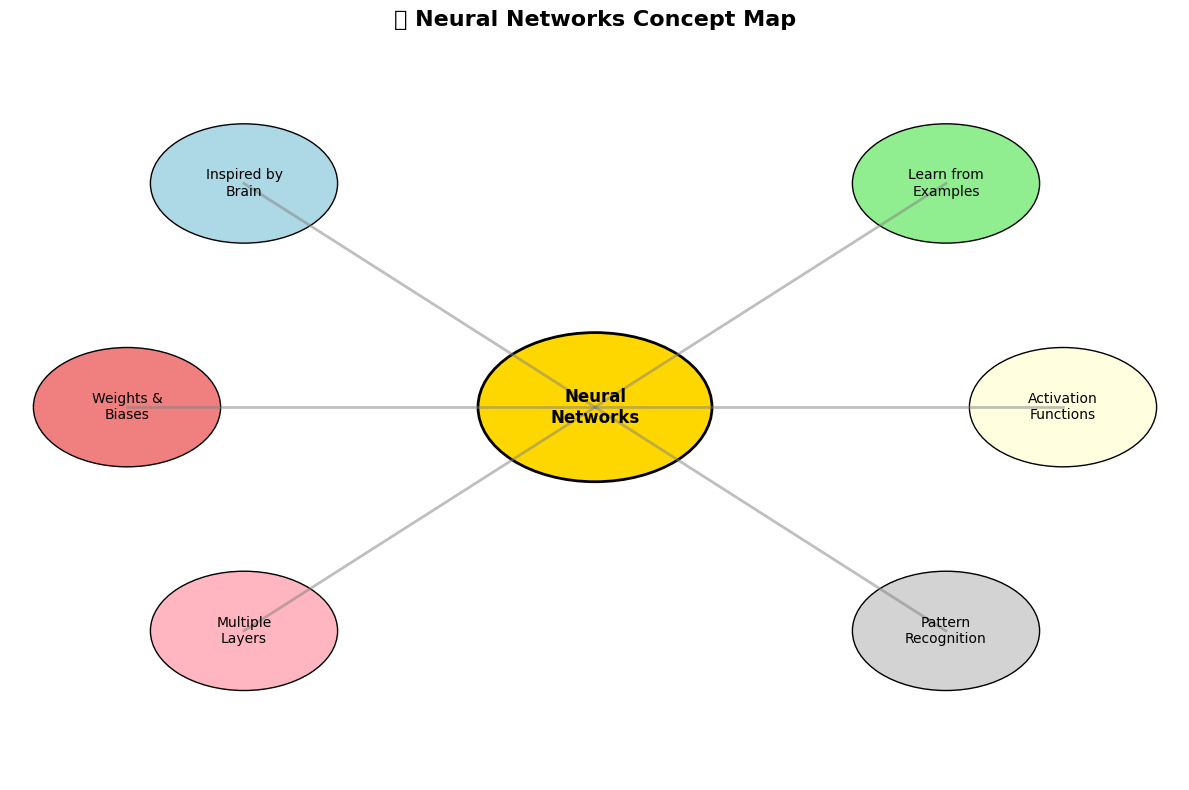



🎉 Congratulations! You've completed Deep Learning Lecture 1!
You now understand the fundamental building blocks of neural networks.

📅 Next class: We'll see how these neurons actually process data step-by-step!

📖 ADDITIONAL RESOURCES AND NEXT STEPS
🎥 Recommended Videos:
- 3Blue1Brown Neural Networks Series: Visual explanations of neural networks
- Andrew Ng's Machine Learning Course: Comprehensive introduction

📚 Reading Materials:
- Neural Networks and Deep Learning by Michael Nielsen (free online)
- Deep Learning by Ian Goodfellow (reference textbook)

🛠️ Tools to Explore:
- TensorFlow Playground: Interactive neural network visualization
- Keras Documentation: High-level neural network library
- PyTorch Tutorials: Another popular deep learning framework

🧪 Experiment Ideas:
1. Modify the restaurant neuron weights and see how recommendations change
2. Create neurons for different decision-making scenarios
3. Build a simple 2-layer network for a problem you care about
4. Compare sin

In [8]:
# ============================================================================
# 🎯 SECTION 6: KEY TAKEAWAYS AND NEXT STEPS
# ============================================================================

print("\n" + "="*60)
print("🎯 SECTION 6: KEY TAKEAWAYS AND NEXT STEPS")
print("="*60)

def summarize_lecture():
    print("🎓 LECTURE 1 SUMMARY: Neural Networks Foundation")
    print("=" * 60)

    key_concepts = {
        "🧠 Neural Networks": "Mathematical models inspired by brain structure",
        "⚖️ Weights": "Determine importance of each input (like personal preferences)",
        "📊 Bias": "Personal threshold or natural tendency",
        "🔥 Activation Functions": "Decision-making rules (ReLU, Sigmoid, etc.)",
        "🏭 Layers": "Assembly line of increasing pattern complexity",
        "🔄 Traditional vs DL": "Rules vs Learning from examples",
        "🎯 Specialization": "Each neuron learns to detect specific patterns"
    }

    print("\n📚 What You've Learned Today:")
    for concept, description in key_concepts.items():
        print(f"   {concept}: {description}")

    print("\n\n🚀 Coming Up in Lecture 2: Forward Propagation")
    print("   • How information flows through the network")
    print("   • Step-by-step calculation walkthrough")
    print("   • Matrix operations for efficiency")
    print("   • Building your first real neural network")

    print("\n\n🏠 Homework Challenges:")
    print("1. Complete all practice problems in this notebook")
    print("2. Design a neuron for a real-world problem you care about")
    print("3. Think of 3 examples where traditional programming fails but neural networks excel")
    print("4. Research one real application of neural networks that interests you")

# Create concept map visualization
def create_concept_map():
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')
    ax.set_title('🗺️ Neural Networks Concept Map', fontsize=16, fontweight='bold')

    # Central concept
    central = plt.Circle((5, 5), 1, color='gold', ec='black', linewidth=2)
    ax.add_patch(central)
    ax.text(5, 5, 'Neural\nNetworks', ha='center', va='center', fontsize=12, fontweight='bold')

    # Surrounding concepts
    concepts = [
        (2, 8, 'Inspired by\nBrain', 'lightblue'),
        (8, 8, 'Learn from\nExamples', 'lightgreen'),
        (1, 5, 'Weights &\nBiases', 'lightcoral'),
        (9, 5, 'Activation\nFunctions', 'lightyellow'),
        (2, 2, 'Multiple\nLayers', 'lightpink'),
        (8, 2, 'Pattern\nRecognition', 'lightgray')
    ]

    for x, y, text, color in concepts:
        circle = plt.Circle((x, y), 0.8, color=color, ec='black')
        ax.add_patch(circle)
        ax.text(x, y, text, ha='center', va='center', fontsize=10)
        # Draw connection to center
        ax.plot([x, 5], [y, 5], 'gray', alpha=0.5, linewidth=2)

    plt.tight_layout()
    plt.show()

# Run summary
summarize_lecture()
create_concept_map()

print("\n\n🎉 Congratulations! You've completed Deep Learning Lecture 1!")
print("You now understand the fundamental building blocks of neural networks.")
print("\n📅 Next class: We'll see how these neurons actually process data step-by-step!")

# ============================================================================
# 📖 ADDITIONAL RESOURCES AND NEXT STEPS
# ============================================================================

print("\n" + "="*60)
print("📖 ADDITIONAL RESOURCES AND NEXT STEPS")
print("="*60)

def show_resources():
    print("🎥 Recommended Videos:")
    print("- 3Blue1Brown Neural Networks Series: Visual explanations of neural networks")
    print("- Andrew Ng's Machine Learning Course: Comprehensive introduction")

    print("\n📚 Reading Materials:")
    print("- Neural Networks and Deep Learning by Michael Nielsen (free online)")
    print("- Deep Learning by Ian Goodfellow (reference textbook)")

    print("\n🛠️ Tools to Explore:")
    print("- TensorFlow Playground: Interactive neural network visualization")
    print("- Keras Documentation: High-level neural network library")
    print("- PyTorch Tutorials: Another popular deep learning framework")

    print("\n🧪 Experiment Ideas:")
    print("1. Modify the restaurant neuron weights and see how recommendations change")
    print("2. Create neurons for different decision-making scenarios")
    print("3. Build a simple 2-layer network for a problem you care about")
    print("4. Compare single-layer vs multi-layer networks on the same problem")

    print("\n🎯 Key Questions to Think About:")
    print("1. Why do neural networks work so well? What makes them different from traditional algorithms?")
    print("2. What problems are neural networks good/bad at? When should you use them vs other approaches?")
    print("3. How do you choose the right architecture? Number of layers, neurons per layer, etc.")
    print("4. What are the limitations? What can't neural networks do?")

    print("\n💡 Remember: Neural networks are just sophisticated pattern-matching tools.")
    print("The magic is in how they combine simple operations to learn complex relationships!")

    print("\n📧 Questions? Discuss with your classmates or instructor about any concepts that need clarification.")

    print("\n🎯 Goal: By the end of this course, you'll be building your own deep learning applications!")

    print("\n📝 Before Next Class:")
    print("- Complete all practice problems")
    print("- Make sure you understand the difference between traditional programming and neural networks")
    print("- Be ready to dive into the mathematics of forward propagation!")

    print("\n🔄 Next Up: Lecture 2 - Forward Propagation 🚀")

# Show resources
show_resources()

# ============================================================================
# END OF LECTURE 1
# ============================================================================

print("\n" + "="*60)
print("END OF DEEP LEARNING LECTURE 1")
print("="*60)
print("Thank you for learning with us! 🎓")
print("See you in the next lecture! 👋")